### Homework

Before you begin, remember to import the necessary libraries.

In [12]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import requests

#### Standard Exercises

In this exercise, you will use the [Makeup API](https://makeup-api.herokuapp.com/) from the [website](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/) we saw in class to retrieve and analyse the [data related to the Maybelline brand](https://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline).

1. Save the sample URL / endpoint as a string to an object called `url` and, unig the `get()` function from the `requests` library, make an HTTP request and save it to a new object named `mkp`.

In [2]:
url = 'http://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline&limit=1000'
r= requests.get(url)

2. Check that the status of the request from the previous point was successful *(hint: 200 = OK)*.

In [3]:
r.status_code

200

3. Using the `.json()` method, check the contents of the data you retrieved via the API call. Then, using the `pd.DataFrame.from_dict()` function, save its contents to a DataFrame named `mkp_df`.

In [4]:
r.json()[0:3]

[{'id': 495,
  'brand': 'maybelline',
  'name': 'Maybelline Face Studio Master Hi-Light Light Booster Bronzer',
  'price': '14.99',
  'price_sign': None,
  'currency': None,
  'image_link': 'https://d3t32hsnjxo7q6.cloudfront.net/i/991799d3e70b8856686979f8ff6dcfe0_ra,w158,h184_pa,w158,h184.png',
  'product_link': 'https://well.ca/products/maybelline-face-studio-master_88837.html',
  'website_link': 'https://well.ca',
  'description': 'Maybelline Face Studio Master Hi-Light Light Boosting bronzer formula has an expert \nbalance of shade + shimmer illuminator for natural glow. Skin goes \nsoft-lit with zero glitz.\n\n\t\tFor Best Results: Brush over all shades in palette and gently sweep over \ncheekbones, brow bones, and temples, or anywhere light naturally touches\n the face.\n\n\t\t\n\t\n\n                    ',
  'rating': 5.0,
  'category': None,
  'product_type': 'bronzer',
  'tag_list': [],
  'created_at': '2016-10-01T18:36:15.012Z',
  'updated_at': '2017-12-23T21:08:50.624Z',
  'p

In [5]:
len(r.json())

54

In [6]:
mkp_df = pd.DataFrame.from_dict(r.json())
mkp_df.head()

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,495,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/991799...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,None,bronzer,[],2016-10-01T18:36:15.012Z,2017-12-23T21:08:50.624Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
1,488,maybelline,Maybelline Fit Me Bronzer,10.29,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/d4f7d8...,https://well.ca/products/maybelline-fit-me-bro...,https://well.ca,Why You'll Love It\n\nLightweight pigments ble...,4.5,None,bronzer,[],2016-10-01T18:36:05.584Z,2017-12-23T21:08:49.985Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#CF9978', 'colour_name': 'Medi..."
2,477,maybelline,Maybelline Facestudio Master Contour Kit,15.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/4f731d...,https://well.ca/products/maybelline-facestudio...,https://well.ca,Maybelline Facestudio Master Contour Kit is th...,NaN,None,bronzer,[],2016-10-01T18:35:40.504Z,2017-12-23T21:08:48.157Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#9B7163', 'colour_name': None}..."
3,468,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/462103...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,NaN,powder,blush,[],2016-10-01T18:35:27.706Z,2017-12-23T21:08:47.102Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
4,452,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/e8c59b...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,powder,blush,[],2016-10-01T18:35:07.476Z,2017-12-23T20:51:17.460Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]


4. Check the data type of all columns in the DataFrame. The `price` variable is stored as a string, but it should be a numeric variable. Convert it to numeric.

In [9]:
mkp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54 non-null     int64  
 1   brand               54 non-null     object 
 2   name                54 non-null     object 
 3   price               54 non-null     float64
 4   price_sign          0 non-null      object 
 5   currency            0 non-null      object 
 6   image_link          54 non-null     object 
 7   product_link        54 non-null     object 
 8   website_link        54 non-null     object 
 9   description         54 non-null     object 
 10  rating              46 non-null     float64
 11  category            31 non-null     object 
 12  product_type        54 non-null     object 
 13  tag_list            54 non-null     object 
 14  created_at          54 non-null     object 
 15  updated_at          54 non-null     object 
 16  product_ap

In [8]:
mkp_df['price'] = pd.to_numeric(mkp_df['price'])

5. Create a new DataFrame named `mkp_df_group` where you group all the `product_type`s and show their average price and rating. 

In [12]:
mkp_df_group = mkp_df[['product_type', 'price', 'rating']]
mkp_df_group.head()

,product_type,price,rating
0,bronzer,14.99,5.0
1,bronzer,10.29,4.5
2,bronzer,15.99,NaN
3,blush,14.99,NaN
4,blush,14.99,5.0


6. Create a scatterplot where you show the relationship between the `price` (on the x-axis) and the `rating` (on the y-axis) variables. 

<AxesSubplot:xlabel='price', ylabel='rating'>

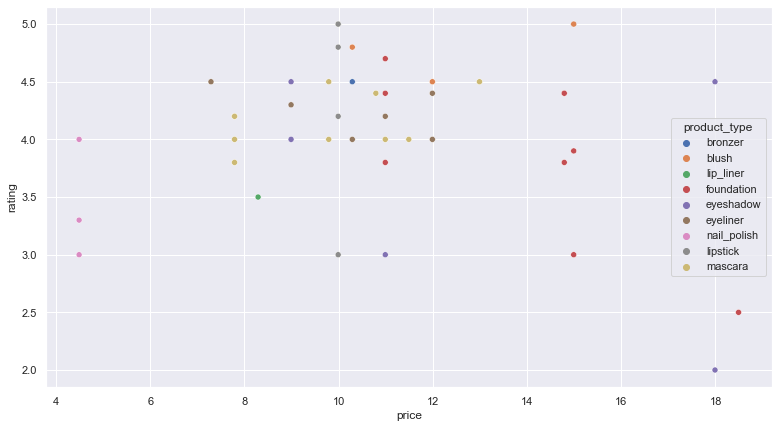

In [16]:
sns.set(rc={'figure.figsize':(13, 7)}) 
sns.scatterplot(x='price', y='rating', hue= 'product_type', data= mkp_df_group)

7. If you were to speak to the product department, which of these products would you recommend them to focus on in order to improve the overall customer satisfaction, considering their value for money?

it is useful to improve or understand customer necessities about product as foundation that has a good price but probably the rating depend on the type of product

#### Advanced Exercises

1. Using an HTTP request to the City of Milan's API endpoint that you will find at [this web page](https://dati.comune.milano.it/dataset/ds411-rilevazione-qualita-aria-2022/resource/e1cc82ec-97bb-463c-a3fb-b61be60f0956), retrieve its data and save it to a DataFrame named `df`. *(hint: careful at the number or records you're retrieving, to be sure, set the limit parameter to be greater than the total number of rows available for that dataset)*

In [29]:
url = 'https://dati.comune.milano.it/api/3/action/datastore_search?resource_id=e1cc82ec-97bb-463c-a3fb-b61be60f0956&limit=3070'

r1=requests.get(url)

In [30]:
r1.status_code

200

In [37]:
r1.json()['result']['records'][0:3]

[{'_id': 1,
  'stazione_id': 1,
  'data': '2022-06-22T00:00:00',
  'inquinante': 'NO2',
  'valore': None},
 {'_id': 2,
  'stazione_id': 2,
  'data': '2022-06-22T00:00:00',
  'inquinante': 'C6H6',
  'valore': None},
 {'_id': 3,
  'stazione_id': 2,
  'data': '2022-06-22T00:00:00',
  'inquinante': 'NO2',
  'valore': 25}]

In [41]:
len(r1.json()['result']['records'])

3065

In [38]:
df = pd.DataFrame.from_dict(r.json()['result']['records'])
df.head()

,_id,stazione_id,data,inquinante,valore
0,1,1,2022-06-22T00:00:00,NO2,NaN
1,2,2,2022-06-22T00:00:00,C6H6,NaN
2,3,2,2022-06-22T00:00:00,NO2,25.0
3,4,2,2022-06-22T00:00:00,O3,116.0
4,5,2,2022-06-22T00:00:00,PM10,31.0


2. Check the data types for all the columns in the DataFrame. Then convert the `data` variable to a datetime with `format="%Y-%m-%d"`. 

In [40]:
df['data']= pd.to_datetime(df['data'], format = "%Y-%m-%d")
df.head()

,_id,stazione_id,data,inquinante,valore
0,1,1,2022-06-22,NO2,NaN
1,2,2,2022-06-22,C6H6,NaN
2,3,2,2022-06-22,NO2,25.0
3,4,2,2022-06-22,O3,116.0
4,5,2,2022-06-22,PM10,31.0


3. Create a new DataFrame named `df_pm10` which is a copy of `df` but contains data only for the **PM10** `inquinante`.

In [53]:
df_pm10 = df[df['inquinante'] == 'PM10'].copy()
df_pm10.head()

,_id,stazione_id,data,inquinante,valore
2904,2876,6,2022-01-14,PM10,106.0
2956,2928,6,2022-01-12,PM10,100.0
1713,1710,7,2022-03-18,PM10,97.0
2487,2454,4,2022-02-07,PM10,96.0
2717,2688,4,2022-01-25,PM10,90.0


4. Which day was the worst in terms of levels of the **PM10** `inquinante` in the City of Milan? How many grams per cubic meter (g/m3) were detected?

In [57]:
df_pm10.sort_values('valore', ascending = False).head()

,_id,stazione_id,data,inquinante,valore
2904,2876,6,2022-01-14,PM10,106.0
2956,2928,6,2022-01-12,PM10,100.0
1713,1710,7,2022-03-18,PM10,97.0
2487,2454,4,2022-02-07,PM10,96.0
2717,2688,4,2022-01-25,PM10,90.0


5. Add a new column named `month` to the `df_pm10` DataFrame where you extract the month date-part from the `date` variable. 

In [59]:
df_pm10['month']= pd.DatetimeIndex(df_pm10['data']).month
df_pm10

,_id,stazione_id,data,inquinante,valore,month
4,5,2,2022-06-22,PM10,31.0,6
12,13,4,2022-06-22,PM10,26.0,6
19,20,6,2022-06-22,PM10,28.0,6
23,24,7,2022-06-22,PM10,22.0,6
31,32,2,2022-06-21,PM10,34.0,6
...,...,...,...,...,...,...
3035,3036,7,2022-01-04,PM10,36.0,1
3043,3044,2,2022-01-03,PM10,54.0,1
3051,3052,4,2022-01-03,PM10,78.0,1
3057,3058,6,2022-01-03,PM10,77.0,1


6. Using the `df_pm10` DataFrame, produce a table that groups all the `months` available in the dataset (by row) and shows (for each month), the following aggregations for the column `valore`: ['min', 'mean', 'max']. 

In [68]:
df_month= df_pm10.groupby('month', as_index= False)['valore'].agg(['min', 'max', 'mean'])
df_month

,min,max,mean
month,,,
1,35.0,106.0,64.027027
2,7.0,96.0,41.253165
3,21.0,97.0,46.728261
4,8.0,53.0,25.985507
5,10.0,41.0,24.416667
6,10.0,39.0,26.173913


7. Using the `df_pm10` DataFrame, plot a time series showing the `valore` of **PM10** for each `stazione_id` *(hint: each stazione_id will have a different line with a different color)*.

<AxesSubplot:xlabel='data', ylabel='valore'>

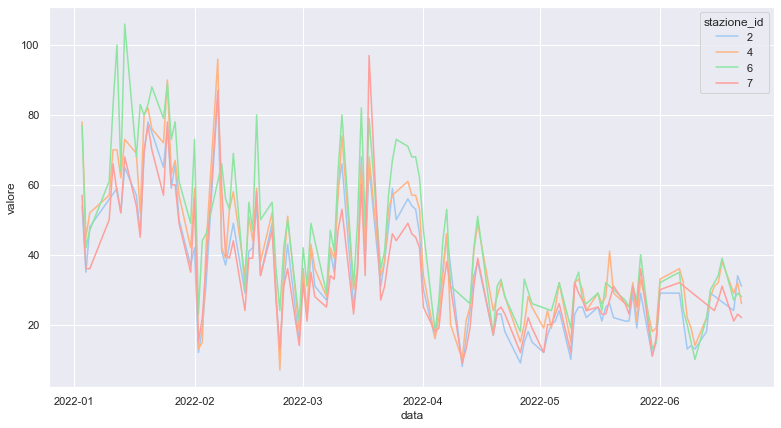

In [73]:
sns.set(rc={'figure.figsize':(13, 7)})
sns.lineplot(x= 'data', y='valore', hue= 'stazione_id',palette='pastel', data= df_pm10)

8. Using an HTTP request to the City of Milan's API endpoint that you will find at [this web page](https://dati.comune.milano.it/dataset/ds484_stazioni_di_monitoraggio_inquinanti_atmosferici_dellarpa_sit/resource/b301f327-7504-4efc-8b4a-5f4a29f9d0ff), retrieve its data and save it to a DataFrame named `stations`. 

In [76]:
url1= 'https://dati.comune.milano.it/api/3/action/datastore_search?resource_id=b301f327-7504-4efc-8b4a-5f4a29f9d0ff&limit=15'
r2= requests.get(url1)
r2.status_code

200

In [79]:
r2.json()['result']['records'][0:1]

[{'_id': 1,
  'id_amat': 1,
  'nome': 'p.le Abbiategrasso',
  'id_arpa': 126,
  'inizio_operativita': '1900-01-01T00:00:00',
  'fine_operativita': '2017-08-31T00:00:00',
  'inquinanti': 'NO2',
  'LONG_X_4326': 9.18218994140625,
  'LAT_Y_4326': 45.432300567627,
  'Location': '(45.432300567627, 9.18218994140625)'}]

In [81]:
stations= pd.DataFrame.from_dict(r2.json()['result']['records'])
stations

,_id,id_amat,nome,id_arpa,inizio_operativita,fine_operativita,inquinanti,LONG_X_4326,LAT_Y_4326,Location
0,1,1,p.le Abbiategrasso,126,1900-01-01T00:00:00,2017-08-31T00:00:00,NO2,9.18219,45.432301,"(45.432300567627, 9.18218994140625)"
1,2,2,via Pascal *,100,1900-01-01T00:00:00,2099-12-31T00:00:00,"O3, PM10, NO2, PM25, SO2, C6H6, SO2",9.23478,45.474098,"(45.4740982055664, 9.23478031158447)"
2,3,3,viale Liguria,107,1900-01-01T00:00:00,2099-12-31T00:00:00,"NO2, CO_8h",9.16944,45.444199,"(45.4441986083984, 9.16944026947021)"
3,4,4,viale Marche,2,1900-01-01T00:00:00,2099-12-31T00:00:00,"NO2, PM10, PM25, CO_8h, C6H6",9.19084,45.496300,"(45.4962997436523, 9.19083976745605)"
4,5,5,Parco Lambro,124,1900-01-01T00:00:00,2017-08-31T00:00:00,"O3, NO2",9.24730,45.499599,"(45.4995994567871, 9.24730014801025)"
5,6,6,via Senato *,125,1900-01-01T00:00:00,2099-12-31T00:00:00,"PM25, C6H6, CO_8h, PM10, NO2",9.19792,45.470501,"(45.4705009460449, 9.19791984558105)"
6,7,7,Verziere,85,1900-01-01T00:00:00,2099-12-31T00:00:00,"PM10, O3, NO2, CO_8h",9.19534,45.463501,"(45.4635009765625, 9.19534015655518)"
7,8,8,p.le Zavattari,7,1900-01-01T00:00:00,2017-08-31T00:00:00,"CO_8h, C6H6, NO2",9.14177,45.476101,"(45.4761009216309, 9.141770362854)"
8,9,9,via Juvara,7,1900-01-01T00:00:00,2007-06-11T00:00:00,"PM10, NO2, PM25, SO2, O3",9.22045,45.473499,"(45.4734992980957, 9.22045040130615)"


9. Which station's `nome` is the one that recorded the highest levels of **PM10** as recorded in the `df_pm10` DataFrame?

In [86]:
df_pm10.head()

,_id,stazione_id,data,inquinante,valore,month
4,5,2,2022-06-22,PM10,31.0,6
12,13,4,2022-06-22,PM10,26.0,6
19,20,6,2022-06-22,PM10,28.0,6
23,24,7,2022-06-22,PM10,22.0,6
31,32,2,2022-06-21,PM10,34.0,6


In [92]:
df_pm10_new= df_pm10[['stazione_id', 'data', 'valore']].merge(stations[['_id', 'nome', 'inquinanti']], how='left', left_on='stazione_id', right_on='_id')
df_pm10_new.sort_values('valore', ascending = False)

,stazione_id,data,valore,_id,nome,inquinanti
442,6,2022-01-14,106.0,6,via Senato *,"PM25, C6H6, CO_8h, PM10, NO2"
450,6,2022-01-12,100.0,6,via Senato *,"PM25, C6H6, CO_8h, PM10, NO2"
260,7,2022-03-18,97.0,7,Verziere,"PM10, O3, NO2, CO_8h"
378,4,2022-02-07,96.0,4,viale Marche,"NO2, PM10, PM25, CO_8h, C6H6"
413,4,2022-01-25,90.0,4,viale Marche,"NO2, PM10, PM25, CO_8h, C6H6"
...,...,...,...,...,...,...
205,2,2022-04-06,NaN,2,via Pascal *,"O3, PM10, NO2, PM25, SO2, C6H6, SO2"
209,2,2022-04-05,NaN,2,via Pascal *,"O3, PM10, NO2, PM25, SO2, C6H6, SO2"
379,6,2022-02-07,NaN,6,via Senato *,"PM25, C6H6, CO_8h, PM10, NO2"
452,2,2022-01-11,NaN,2,via Pascal *,"O3, PM10, NO2, PM25, SO2, C6H6, SO2"


In [ ]:
### match = match.merge(team[['team_api_id','team_long_name']], how='left', left_on='away_team_api_id', right_on='team_api_id')